# 📊 Superstore Sales EDA


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")

# Load dataset
data = pd.read_csv('data/train.csv')

data.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## 🔍 Step 1: Initial Data Overview

We start by examining the dataset structure, checking for missing values, and understanding data types.

This step is crucial to plan the appropriate cleaning and transformation steps.


In [2]:
# General information about the data structure
data.info()

# Checking for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## 🧹 Step 2: Data Cleaning

We remove rows with missing postal codes and convert date columns to datetime format.  
This ensures data consistency and prepares the dataset for further analysis.





In [3]:
# Remove rows with missing Postal Code
data = data.dropna(subset=['Postal Code'])

# Convert Order Date and Ship Date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)

# Extract month for trend analysis
data['Month'] = data['Order Date'].dt.to_period('M')




In [4]:
data['Postal Code'].isnull().sum()

np.int64(0)

In [5]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Month                 period[M]
dtype: object

### 👥 Step 3: Sales by Customer Segment

We analyze how total sales are distributed across different customer segments.  
This helps identify which group brings in the most revenue and may influence targeting strategies.


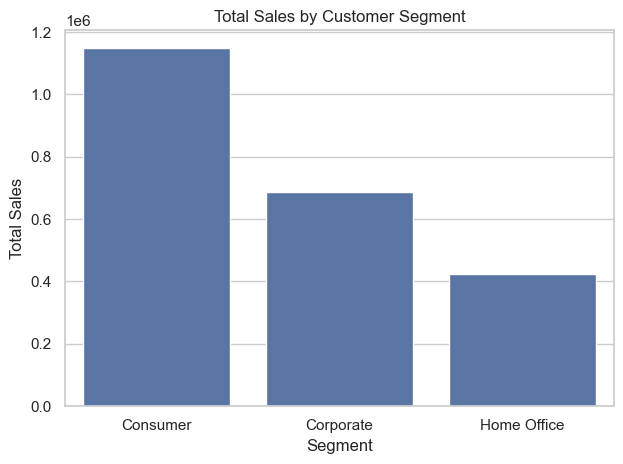

In [8]:
# Group total sales by customer segment
segment_sales = data.groupby('Segment', as_index=False)['Sales'].sum()

# Create bar plot
sns.barplot(data=segment_sales, x='Segment', y='Sales')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('graphs/segment_sales.png')  # Save figure
plt.show()





### 🗓️ Step 5: Monthly Sales Trend

We examine how total sales evolve month by month.  
This trend helps identify seasonality, performance peaks, and opportunities for time-based marketing strategies.



In [11]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

In [12]:
#'Month' column
data['Month'] = data['Order Date'].dt.to_period('M')


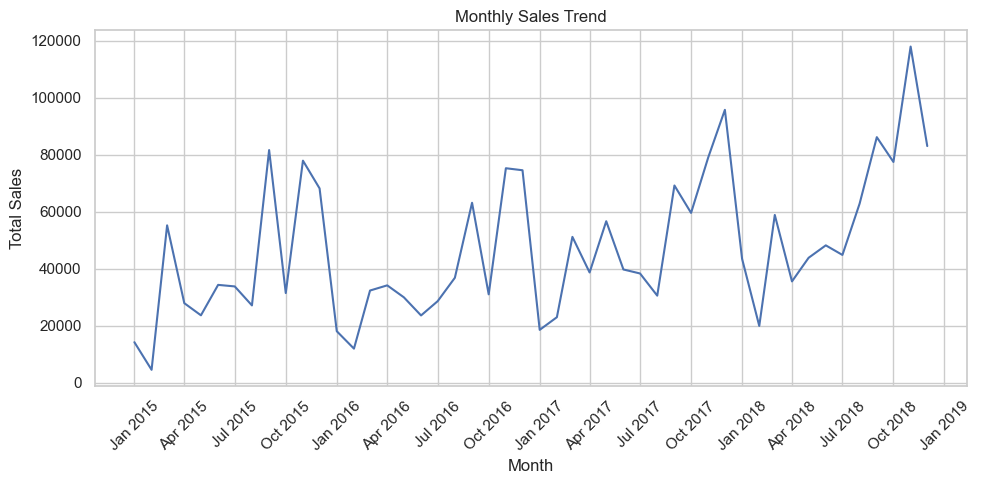

In [15]:
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])

import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Format the x-axis with readable dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., Jan 2019
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # show every 3rd month
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/monthly_sales.png')
plt.show()




🪑 **Sales by Product Category**

This chart shows how total sales are distributed across major product categories: Furniture, Office Supplies, and Technology.


    

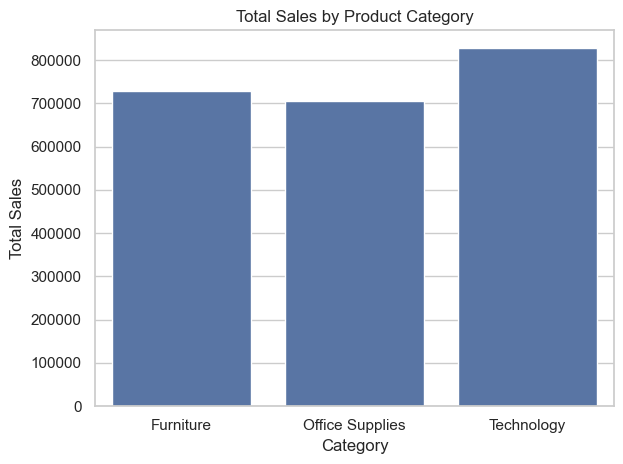

In [16]:
# Total sales by product category
category_sales = data.groupby('Category')['Sales'].sum().reset_index()

sns.barplot(data=category_sales, x='Category', y='Sales')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('graphs/category_sales.png')  # Save to file
plt.show()





